In [1]:
import os
import pandas as pd

In [19]:
#筛选出全部university和college的POI

def extractCampusPOI (input_csv,output_csv) :
    pois = pd.read_csv(input_csv,sep='|',header=None).dropna()
    pois.index = range(pois.shape[0])
    pois.columns = ['type_code','OSM-ID','lat','lon','what']
    pois['type_code'] = pois['type_code'].values[:].astype(int)

#     pois.to_csv(output_csv,index=False)
    
    campus_pois = pois[(pois['type_code'] == 22)]
    campus_pois.to_csv(output_csv,index=0,encoding='utf-8-sig')
    print(campus_pois)

In [21]:
input_pbf  = 'E:/AAA_Study/202003_GraduationProject/MapData/OSMData/sources/zurich_switzerland.osm.pbf'
input_csv = input_pbf.replace('.osm.pbf','.csv')
output_csv = input_csv.replace('.csv','_campusPOI.csv')
extractCampusPOI(input_csv,output_csv)

       type_code       OSM-ID        lat       lon  \
11442         22  N3094709495  47.496971  8.730291   
12910         22  N3856374184  47.410793  8.540201   
17607         22  N5257829387  47.414368  8.549618   
17608         22  N5257829388  47.413189  8.548750   
22485         22    W27327898  47.372120  8.550083   
22535         22    W28367342  47.408315  8.508406   
22643         22    W30296204  47.302005  8.552684   
22658         22    W30406309  47.358915  8.560088   
22702         22    W22297166  47.502134  8.726530   
22715         22    W22440217  47.497357  8.728392   
22716         22    W22440547  47.497277  8.729339   
22717         22    W22441502  47.497245  8.730466   
22718         22    W22441962  47.496864  8.729434   
22719         22    W22445029  47.497564  8.731284   
22728         22    W22463183  47.503291  8.726784   
22730         22    W22468228  47.496405  8.728914   
22731         22    W22468291  47.495434  8.730984   
22904         22     W811524

In [30]:
coords_z = [(47.3716777,8.5485886),(47.450041,8.6829594),(47.4935204,8.7159408),(47.3731887,8.5527886)]
coords_b = [(39.9692584,116.307444),(39.957859,116.3098189),(39.9639862,116.3449961),(40.1558553,116.2828453)]

In [23]:
import osmnx as ox
import networkx as nx
from IPython.display import Image

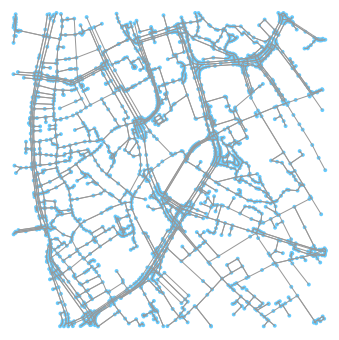

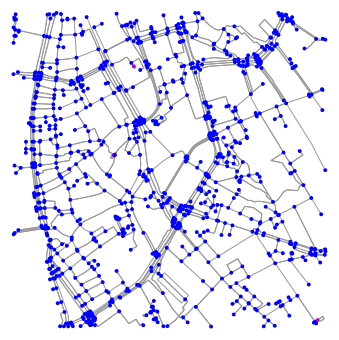

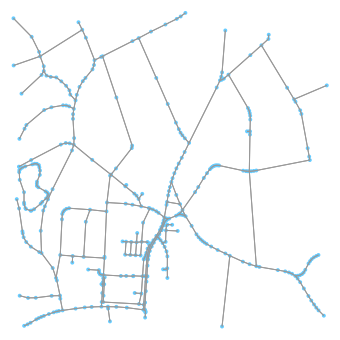

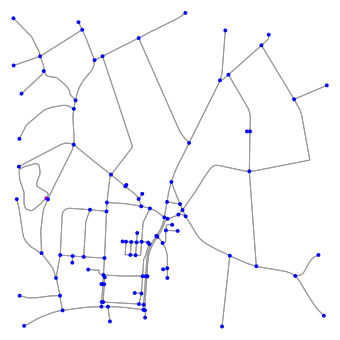

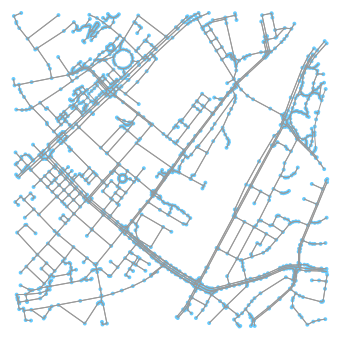

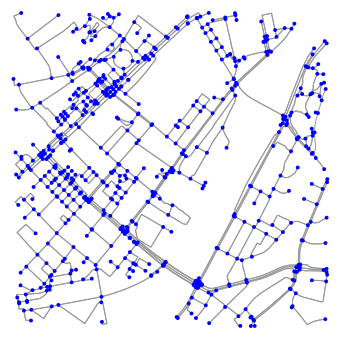

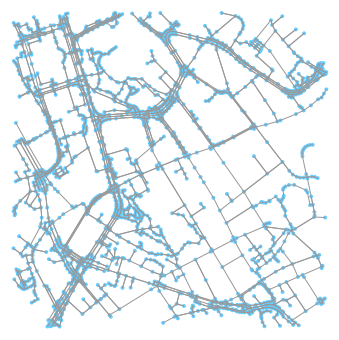

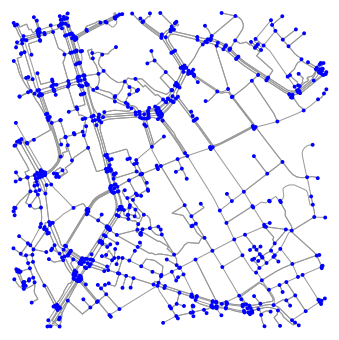

In [32]:
for coord in coords_z:
    G = ox.graph_from_point(coord, distance=500, network_type='all',simplify=False)
    ox.plot_graph(G)
    # simplify the network
    G2 = G.copy()
    G2 = ox.simplify_graph(G2)
    loops = [edge[0] for edge in nx.selfloop_edges(G2)]
    nc = ['m' if node in loops else 'b' for node in G2.nodes()]
    fig, ax = ox.plot_graph(G2, node_color='w',node_edgecolor='k', node_zorder=3)

13952883    3994.357806
27306847    2318.924779
27307078    2399.258491
27307145     937.981912
27307158    1550.986958
dtype: float64


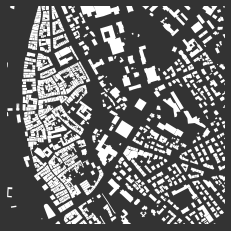

32619447    1645.283235
32619448     972.807645
32619449    1389.666422
32619450    1968.800341
32619451    1782.195914
dtype: float64


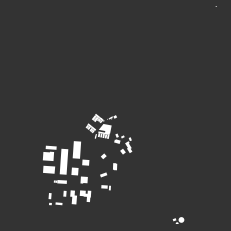

22428731    5152.842110
22430631     154.922012
22430780     837.829229
22468102     281.248677
22468103     695.859240
dtype: float64


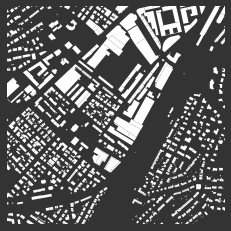

13952883    3994.357806
14689665     209.160867
21633922    1713.944586
24910306    1283.090553
25942533    3094.589433
dtype: float64


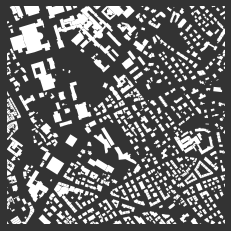

In [35]:
for coord in coords_z:
    gdf = ox.footprints.footprints_from_point(point=coord, distance=500)
    gdf_proj = ox.project_gdf(gdf)
    
    areas = gdf_proj.area
    print(areas.head())
    
    bbox = ox.bbox_from_point(point=coord, distance=500, project_utm=True)
    fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='w', figsize=(4,4), bbox=bbox,save=False, show=True, close=True, filename='paris_bldgs', dpi=90)


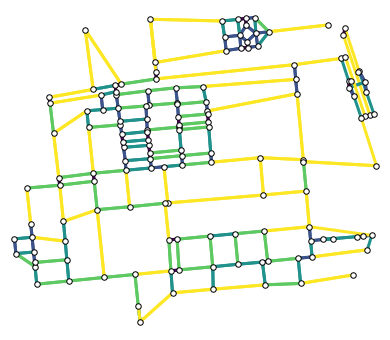

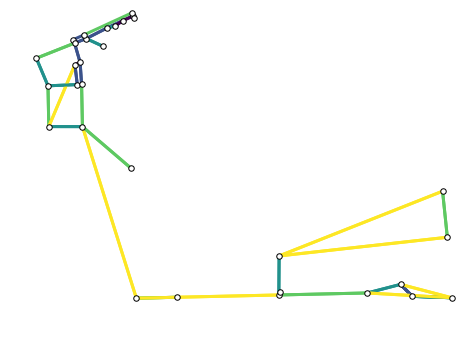

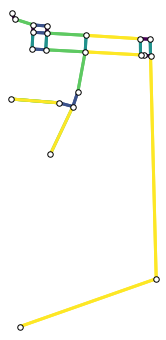

In [29]:
for coord in coords_b:
    G = ox.graph_from_point(coord, distance=500, network_type='all')
    # plot same network ignoring the edges' spatial geometry
    ec = ox.get_edge_colors_by_attr(G, attr='length')
    fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, node_zorder=3, 
                           edge_color=ec, edge_linewidth=3, edge_alpha=1, use_geom=False)